# Sample Rate Accuracy Relation
In this Notebook we'll look at the relationship between accuracy and sample rate on the Diving48 dataset and the SlowFast network.

To do this, we need to combine the results from three runs:
1. `run44/stats.json` `NUM_FRAMES = 16`
2. `run19/stats.json` `NUM_FRAMES = 32`
3. `run20/stats.json` `NUM_FRAMES = 64`

All the test accuracies will be put in a single plot, and saved as a `.pgf` file so it can be nicely formatted using latex.

In [1]:
import json
import matplotlib

import numpy as np
import matplotlib.pyplot as plt

# matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [65]:
def load_stats(stats_path):
    with open(stats_path, 'r') as f:
        return json.load(f)

# Vanilla
sr16_acc_test = load_stats('run44/stats.json')['test_accuracies']
sr32_acc_test = load_stats('run9/stats.json')['test_accuracies']
sr64_acc_test = load_stats('run20/stats.json')['test_accuracies']

# RandAug
ra16_acc_test = load_stats('run4/stats.json')['test_accuracies']
ra32_acc_test = load_stats('run7/stats.json')['test_accuracies']
ra64_acc_test = load_stats('run15/stats.json')['test_accuracies']

# RandAug + Kinetics400 weights
rk32_acc_test = load_stats('run8/stats.json')['test_accuracies']
rk64_acc_test = load_stats('run22/stats.json')['test_accuracies']
rk128_acc_test = load_stats('run45/stats.json')['test_accuracies']

# Threshold
th32_acc_test = load_stats('run10/stats.json')['test_accuracies']
th64_acc_test = load_stats('run14/stats.json')['test_accuracies']

# Extend Classes
ec64_acc_test = load_stats('run34/stats.json')['test_accuracies']

max_vals_nof = sorted([max(sr16_acc_test), max(sr32_acc_test), max(sr64_acc_test)])
max_vals_ra = sorted([max(ra16_acc_test), max(ra32_acc_test), max(ra64_acc_test)])
max_vals_rk = sorted([max(rk32_acc_test), max(rk64_acc_test), max(rk128_acc_test)])
max_vals_th = sorted([max(th32_acc_test), max(th64_acc_test)])
max_vals_ec = sorted([max(ec64_acc_test)])

In [2]:


plt.plot(range(len(max_vals_nof)), max_vals_nof, marker='o', label='a) Vanilla')
plt.annotate(f'{max_vals_nof[0]:.3f}', (0, max_vals_nof[0]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'{max_vals_nof[1]:.3f}', (1, max_vals_nof[1]), textcoords="offset points", xytext=(0, -17), ha='center')
plt.annotate(f'{max_vals_nof[2]:.3f}', (2, max_vals_nof[2]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.plot(range(len(max_vals_ra)), max_vals_ra, marker='o', label='b) RandAug')
plt.annotate(f'{max_vals_ra[0]:.3f}', (0, max_vals_ra[0]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'{max_vals_ra[1]:.3f}', (1, max_vals_ra[1]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'{max_vals_ra[2]:.3f}', (2, max_vals_ra[2]), textcoords="offset points", xytext=(0, -17), ha='center')

plt.plot([1, 2, 3], max_vals_rk, marker='o', label='c) RandAug + Kinetics400 Weights')
for i, val in enumerate(max_vals_rk, start=1):
    plt.annotate(f'{val:.3f}', (i, val), textcoords="offset points", xytext=(0, 10), ha='center')

plt.plot([1, 2], max_vals_th, marker='o', label='d) Threshold')
for i, val in enumerate(max_vals_th, start=1):
    plt.annotate(f'{val:.3f}', (i, val), textcoords="offset points", xytext=(0, 10), ha='center')

plt.plot([2], max_vals_ec, marker='o', label='e) Extend Classes')
plt.annotate(f'{max_vals_ec[0]:.3f}', (2, max_vals_ec[0]), textcoords="offset points", xytext=(20, 0), ha='center')

plt.xlabel('Number of Frames')
plt.ylabel('Maximum Test Accuracy')
plt.title('Hyperparameter Comparison')
plt.grid(True, axis='y', which='major')
plt.xticks([0, 1, 2, 3], ['16', '32', '64', '128'])
plt.ylim(max_vals_nof[0] - 0.04, max_vals_rk[-1] + 0.07)
plt.tight_layout()
plt.legend()
plt.savefig('hyperparams.pgf')
plt.show()


NameError: name 'max_vals_nof' is not defined

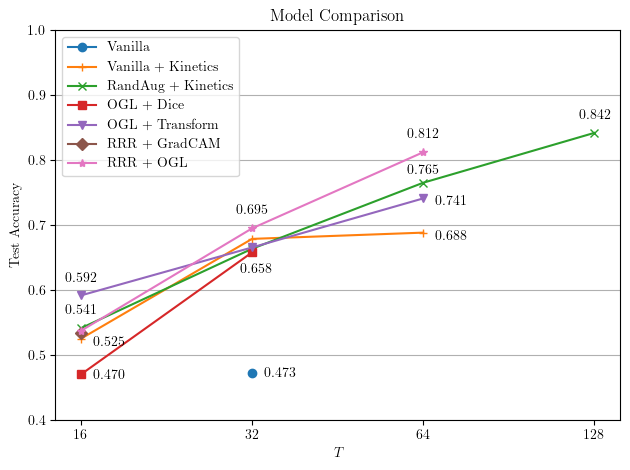

In [3]:
# Vanilla
vanilla = [
    0.4731781376518219 # T = 32
]
# Vanilla + Kinetics
vanilla_and_kinetics = [
    0.5252016129032258, # T = 16
    0.6786437246963563, # T = 32
    0.6882591093117408, # T = 64
]

# RandAug + Kinetics
randaug_and_kinetics = [
    0.5413306451612904, # T = 16,
    0.6634615384615384, # T = 32
    0.7649746192893401, # T = 64
    0.8416243654822335, # T = 128
]

# Threshold = 300
threshold = [
    0.6618852459016393, # T = 32
]

# OGL + Dice
ogl_and_dice = [
    0.47026209677419356, # T = 16
    0.6578947368421053, # T = 32
]

# OGL + Transform
ogl_transform = [
     0.5917338709677419, # T = 16
     0.6654858299595142, # T = 32
     0.7408722109533469, # T = 64
]

# RRR + GradCAM
rrr_grad = [
    0.5337701612903226, # T = 16
]


# RRR + OGL
rrr_ogl = [
    0.5372983870967742, # T = 16
    0.694838056680162, # T = 32
    0.8118661257606491, # T = 64
]

plt.plot([1], vanilla, marker='o', label='Vanilla')
plt.annotate(f'{vanilla[0]:.3f}', (1, vanilla[0]), textcoords="offset points", xytext=(20, -3), ha='center')

plt.plot([0, 1, 2], vanilla_and_kinetics, marker='+', label='Vanilla + Kinetics')
plt.annotate(f'{vanilla_and_kinetics[0]:.3f}', (0, vanilla_and_kinetics[0]), textcoords="offset points", xytext=(20, -5), ha='center')
# plt.annotate(f'{vanilla_and_kinetics[1]:.3f}', (1, vanilla_and_kinetics[1]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'{vanilla_and_kinetics[2]:.3f}', (2, vanilla_and_kinetics[2]), textcoords="offset points", xytext=(20, -5), ha='center')

plt.plot([0, 1, 2, 3], randaug_and_kinetics, marker='x', label='RandAug + Kinetics')
plt.annotate(f'{randaug_and_kinetics[0]:.3f}', (0, randaug_and_kinetics[0]), textcoords="offset points", xytext=(0, 10), ha='center')
# plt.annotate(f'{randaug_and_kinetics[1]:.3f}', (1, randaug_and_kinetics[1]), textcoords="offset points", xytext=(0, -15), ha='center')
plt.annotate(f'{randaug_and_kinetics[2]:.3f}', (2, randaug_and_kinetics[2]), textcoords="offset points", xytext=(0, 6), ha='center')
plt.annotate(f'{randaug_and_kinetics[3]:.3f}', (3, randaug_and_kinetics[3]), textcoords="offset points", xytext=(0, 10), ha='center')


plt.plot([0, 1], ogl_and_dice, marker='s', label='OGL + Dice')
plt.annotate(f'{ogl_and_dice[0]:.3f}', (0, ogl_and_dice[0]), textcoords="offset points", xytext=(20, -3), ha='center')
plt.annotate(f'{ogl_and_dice[1]:.3f}', (1, ogl_and_dice[1]), textcoords="offset points", xytext=(3, -15), ha='center')

plt.plot([0, 1, 2], ogl_transform, marker='v', label='OGL + Transform')
plt.annotate(f'{ogl_transform[0]:.3f}', (0, ogl_transform[0]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'{ogl_transform[2]:.3f}', (2, ogl_transform[2]), textcoords="offset points", xytext=(20, -5), ha='center')


plt.plot([0], rrr_grad, marker='D', label='RRR + GradCAM')


plt.plot([0, 1, 2], rrr_ogl, marker='*', label='RRR + OGL')
plt.annotate(f'{rrr_ogl[1]:.3f}', (1, rrr_ogl[1]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'{rrr_ogl[2]:.3f}', (2, rrr_ogl[2]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('$T$')
plt.ylabel('Test Accuracy')
plt.title('Model Comparison')
plt.grid(True, axis='y', which='major')
plt.xticks([0, 1, 2, 3], ['16', '32', '64', '128'])
plt.ylim(0.4, 1.0)
plt.tight_layout()
plt.legend()
plt.savefig('model_accuracies.png')
plt.show()

In [7]:
improvement_rand = np.mean((np.array(rrr_ogl) - np.array(randaug_and_kinetics[:-1]))) * 100
improvement_van= np.mean((np.array(rrr_ogl) - np.array(vanilla_and_kinetics))) * 100
improvement_rand, improvement_van

(2.474525554180547, 5.063270754208748)

## $\alpha$ and $\beta$

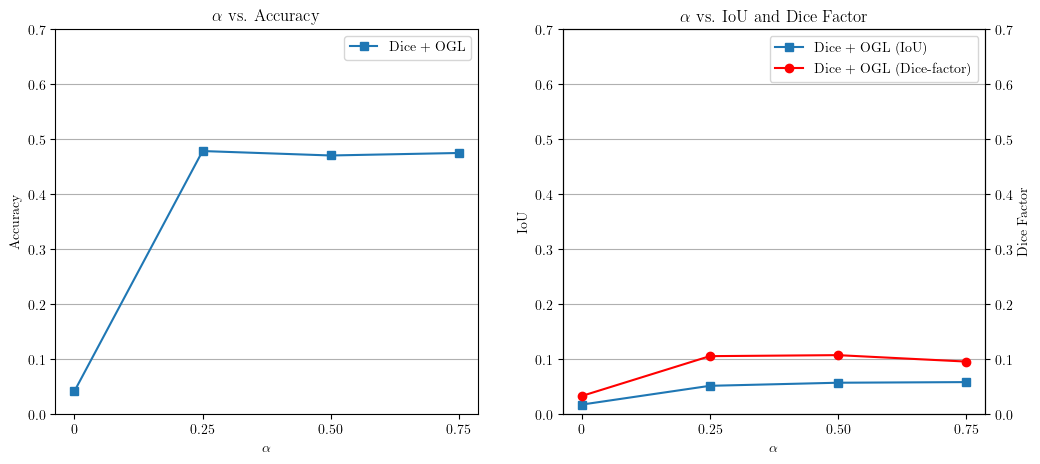

In [16]:
accuracy = [
    0.041834677419354836, # \alpha = 0.0
    0.4783266129032258, # \alpha = 0.25
    0.47026209677419356, # \alpha = 0.5
    0.4747983870967742 # \alpha = 0.75
]

iou_slow = [
    0.017321196287089297, # \alpha = 0.0
    0.05146763117433439, # \alpha = 0.25
    0.05707884308418282, # \alpha = 0.25
    0.05822175036859416, # \alpha = 0.50
]

dice_slow = [
    0.03299427091804964, # \alpha = 0.0
    0.10540686555297268, # \alpha = 0.25
    0.10724108599820117, # \alpha = 0.50
    0.0955598301325853, # \alpha = 0.75
]

plt.figure(figsize=(12, 5))
plt.tight_layout()

ax = plt.subplot(1, 2, 1)

ax.plot([0, 1, 2, 3], accuracy, marker='s', label='Dice + OGL')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('Accuracy')
ax.set_title('$\\alpha$ vs. Accuracy')
ax.grid(True, axis='y', which='major')
ax.set_xticks([0, 1, 2, 3], ['0', '0.25', '0.50', '0.75'])
ax.set_ylim(0.0, 0.7)
ax.legend()


ax = plt.subplot(1, 2, 2)
ax.set_title('$\\alpha$ vs. IoU and Dice Factor')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('IoU')
ax.plot([0, 1, 2, 3], iou_slow, marker='s', label='Dice + OGL (IoU)')
ax.set_xticks([0, 1, 2, 3], ['0', '0.25', '0.50', '0.75'])
ax.set_ylim(0.0, 0.7)
ax.grid(True, axis='y', which='major')
ax.legend()


ax2 = ax.twinx()
ax2.set_ylabel('Dice Factor')

ax2.plot([0, 1, 2, 3], dice_slow, marker='o', color='red', label='Dice + OGL (Dice-factor)')
ax2.set_ylim(0.0, 0.7)

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.savefig('ogl_dice_alpha.png')
plt.show()

## GFLOPs

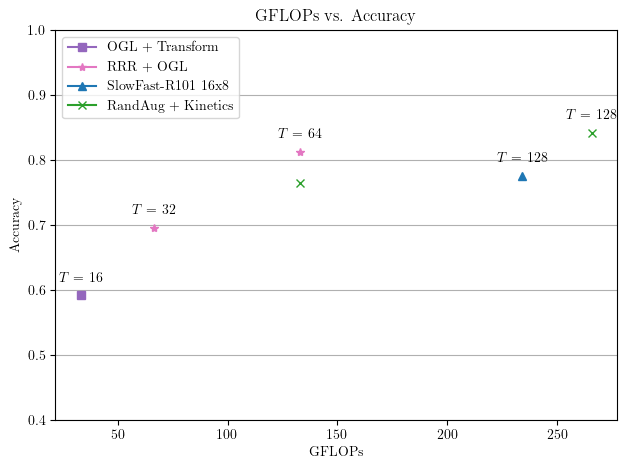

In [15]:
gflops = [
    33.21,
    66.42,
    132.84,
    234.00,
    132.84,
    265.69,
]

accuracy = [
    0.5917338709677419,
    0.694838056680162,
    0.7649746192893401,
    0.776,
    0.8118661257606491,
    0.8416243654822335
]

plt.plot([gflops[0]], [accuracy[0]], marker='s', label='OGL + Transform', color='tab:purple')
plt.plot([gflops[1]], [accuracy[1]], marker='*', label='RRR + OGL', color='tab:pink')
plt.plot([gflops[2]], [accuracy[2]], marker='x', color='tab:green')
plt.plot([gflops[3]], [accuracy[3]], marker='^', label='SlowFast-R101 16x8')
plt.plot([gflops[4]], [accuracy[4]], marker='*', color='tab:pink')
plt.plot([gflops[5]], [accuracy[5]], marker='x', label='RandAug + Kinetics', color='tab:green')

plt.annotate(f'$T$ = 16', (gflops[0], accuracy[0]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'$T$ = 32', (gflops[1], accuracy[1]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'$T$ = 64', (gflops[4], accuracy[4]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'$T$ = 128', (gflops[3], accuracy[3]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'$T$ = 128', (gflops[5], accuracy[5]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('GFLOPs')
plt.ylabel('Accuracy')
plt.title('GFLOPs vs. Accuracy')
plt.grid(True, axis='y', which='major')
plt.ylim(0.4, 1.0)
plt.tight_layout()
plt.legend()
plt.savefig('model_gflops.png')
plt.show()

## RRR

In [ ]:
lambdas = [
    0.5337701612903226, # lambda = 0.01
    0.4944556451612903, # lambda = 0.1
    0.4894153225806452, # lamda = 0.5
    0.49899193548387094, # lambda = 1.0
]

worst_performers = [
    0.4944556451612903, # percentile = 10
    0.5141129032258065, # percentile = 20,
    0.4944556451612903, # percentile = 30,
]